In [ ]:
import kagglehub
path=kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")
print("paths of dataset: ",path)

paths of dataset:  /kaggle/input/animal-image-dataset-90-different-animals


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [ ]:

gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is being used.")
else:
    print("GPU is not being used.")


GPU is being used.


In [ ]:

dataset_path="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
classes=os.listdir(dataset_path)
number_of_classes=len(classes)
print("Number of classes: ",number_of_classes)
print("Classes: ",classes)

Number of classes:  90
Classes:  ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


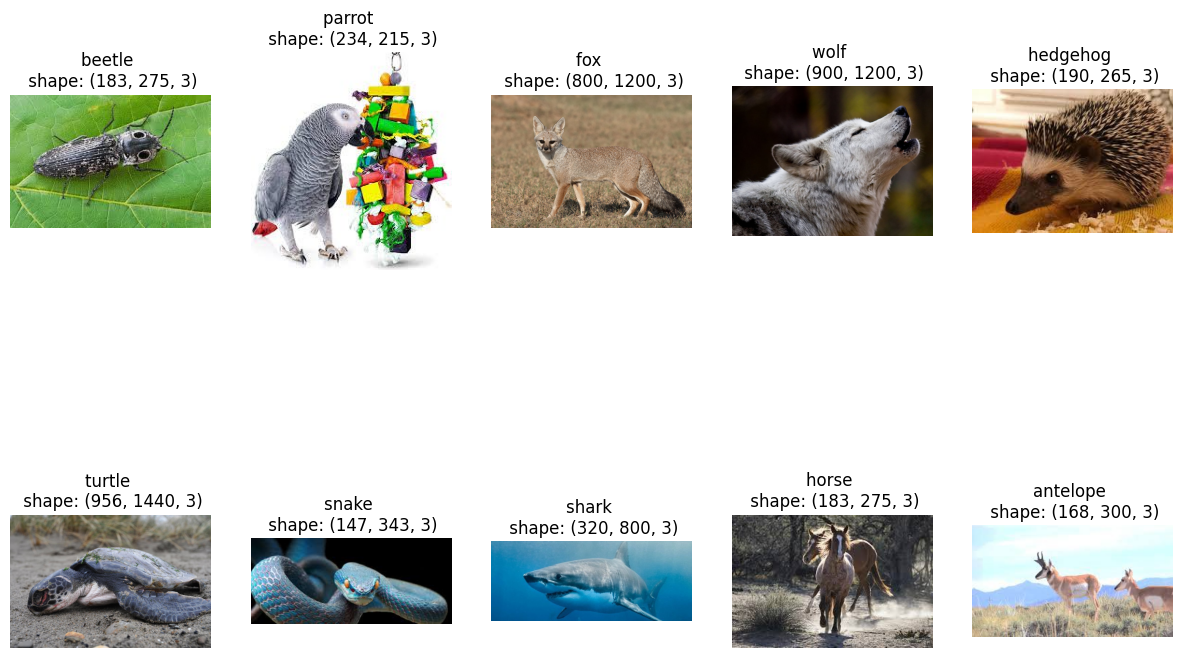

In [ ]:
plt.figure(figsize=(15,10))
for i,class_name in enumerate(classes[:10]):
  img_path=os.path.join(dataset_path,class_name,os.listdir(os.path.join(dataset_path,class_name))[0])
  img=plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
size = (224, 224)
batch = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=size,
    batch_size=batch,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=size,
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)

class_names = list(class_indices.keys())
print("Class Names:", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(number_of_classes, activation='softmax')(x) # output layer


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch,
    epochs = 20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 633ms/step - accuracy: 0.0497 - loss: 4.4881 - val_accuracy: 0.5332 - val_loss: 3.1935
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.2812 - loss: 3.3848

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2812 - loss: 3.3848 - val_accuracy: 0.5371 - val_loss: 3.1820
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 493ms/step - accuracy: 0.4175 - loss: 2.9388 - val_accuracy: 0.7109 - val_loss: 1.8637
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5938 - loss: 1.8100 - val_accuracy: 0.7227 - val_loss: 1.8404
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 496ms/step - accuracy: 0.6547 - loss: 1.7345 - val_accuracy: 0.7812 - val_loss: 1.2076
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6250 - loss: 1.3952 - val_accuracy: 0.7812 - val_loss: 1.1949
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 491ms/step - accuracy: 0.7361 - loss: 1.1572 - val_accuracy: 0.8164 - val_loss: 0.9535
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6562 - loss: 1.4682 - val_accuracy: 0.8281 - val_loss: 0.9331
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 507ms/step - accuracy: 0.7862 - loss: 0.8942 - val_accuracy: 0.8340 - val_

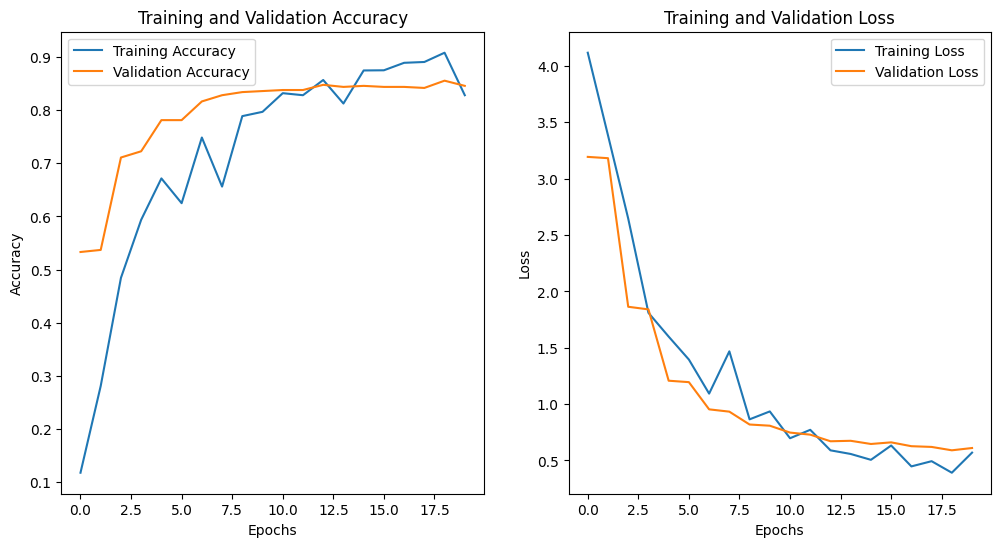

In [ ]:
# Evaluate the model - plotting the training and validation acc/loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 862ms/step - accuracy: 0.8461 - loss: 0.6248
Validation Loss: 0.5986707210540771
Validation Accuracy: 0.8481481671333313


In [ ]:
model.save('MCAR.keras')

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('MCAR.keras')

def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [21]:
os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf')

['9cdcad3179.jpg',
 '247beaf6bd.jpg',
 '5f01c34451.jpg',
 '15eebd79cb.jpg',
 '2a1a8a7e14.jpg',
 '843e6810e0.jpg',
 '7fd7fe81cf.jpg',
 '6e61499ab8.jpg',
 '58eac1d1a1.jpg',
 '0e7ce42fd2.jpg',
 '1a4ffd8af3.jpg',
 '3b448618eb.jpg',
 '573b1b0393.jpg',
 '432cfb1258.jpg',
 '3b2e27503f.jpg',
 '47d8f719cb.jpg',
 '996fb0a526.jpg',
 '3ee1588420.jpg',
 '7b04dad848.jpg',
 '389b3092bc.jpg',
 '85d7b35232.jpg',
 '7e89ab5ef0.jpg',
 '443e0ad4e7.jpg',
 '277c434994.jpg',
 '778d849672.jpg',
 '55c94eb8c6.jpg',
 '7b1b59b5a5.jpg',
 '0e238d32f4.jpg',
 '3dbd3f4fc9.jpg',
 '0f43a8237e.jpg',
 '55fd9f9b33.jpg',
 '06e320f74d.jpg',
 '98e5a29f90.jpg',
 '34bd22f913.jpg',
 '0db670ecbe.jpg',
 '5aa817b12f.jpg',
 '365b582c58.jpg',
 '27bcfb5fec.jpg',
 '49a0c85b3b.jpg',
 '1e6019d07d.jpg',
 '0dac8cc0bf.jpg',
 '07c803c409.jpg',
 '6b1295488f.jpg',
 '05fa57874a.jpg',
 '6d01eb24e1.jpg',
 '3e6d5f5ded.jpg',
 '9c3db9d85d.jpg',
 '352ef543bf.jpg',
 '702ef9b06a.jpg',
 '9aaeb59193.jpg',
 '9a059979c1.jpg',
 '5e589e73ec.jpg',
 '6f8cb24654

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


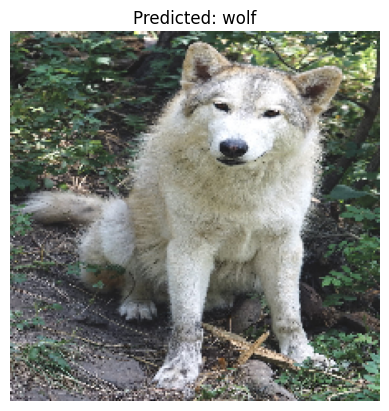

In [22]:
predict_animal('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf/580f62e0f1.jpg')